# Train Dataset

Dataset loading completed


/home/ogech/RML22/code/TrainHelper.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_file))


Existing model loaded.
n_prev_epochs is:  91


/home/ogech/software/miniconda3/envs/gnuradio/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:525: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Epoch: 92 LR: [0.001]
Epoch number:  92  starting
2024-09-17 07:46:21.462574
Epoch Number:  92  and Batch number:  1000  complete
2024-09-17 07:46:26.617804
Epoch Number:  92  and Batch number:  2000  complete
2024-09-17 07:46:31.699203
Epoch Number:  92  and Batch number:  3000  complete
2024-09-17 07:46:36.701735
Epoch Number:  92  and Batch number:  4000  complete
2024-09-17 07:46:41.875544
Epoch Number:  92  and Batch number:  5000  complete
2024-09-17 07:46:47.029801
Epoch Number:  92  and Batch number:  6000  complete
2024-09-17 07:46:52.368242
Epoch Number:  92  and Batch number:  7000  complete
2024-09-17 07:46:57.633595
Epoch Number:  92  and Batch number:  8000  complete
2024-09-17 07:47:02.782910
Train accuracy:  0.502250744047619
Validation accuracy:  0.49766369047619047
Validation loss increased from 0.976112 to 1.262948.
Epoch 92 : Training Loss = 1.245375,  Validation Loss = 1.262948
Epoch: 93 LR: [0.001]
Epoch number:  93  starting
2024-09-17 07:47:07.199880


/home/ogech/RML22/code/TrainHelper.py:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_file))


Epoch Number:  93  and Batch number:  1000  complete
2024-09-17 07:47:12.505293
Epoch Number:  93  and Batch number:  2000  complete
2024-09-17 07:47:17.662985
Epoch Number:  93  and Batch number:  3000  complete
2024-09-17 07:47:22.924986
Epoch Number:  93  and Batch number:  4000  complete
2024-09-17 07:47:28.098762
Epoch Number:  93  and Batch number:  5000  complete
2024-09-17 07:47:33.283110
Epoch Number:  93  and Batch number:  6000  complete
2024-09-17 07:47:38.461868
Epoch Number:  93  and Batch number:  7000  complete
2024-09-17 07:47:43.588900
Epoch Number:  93  and Batch number:  8000  complete
2024-09-17 07:47:48.673686
Train accuracy:  0.44149925595238093
Validation accuracy:  0.4378422619047619
Validation loss increased from 0.976112 to 1.396439.
Epoch 93 : Training Loss = 1.384441,  Validation Loss = 1.396439
Epoch: 94 LR: [0.001]
Epoch number:  94  starting
2024-09-17 07:47:53.073062
Epoch Number:  94  and Batch number:  1000  complete
2024-09-17 07:47:58.530383
Epoch N

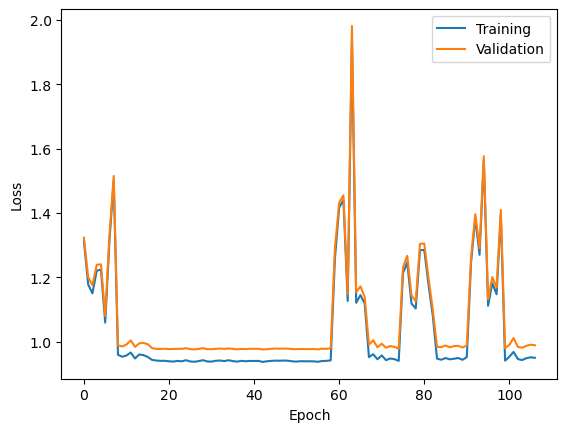

<Figure size 640x480 with 0 Axes>

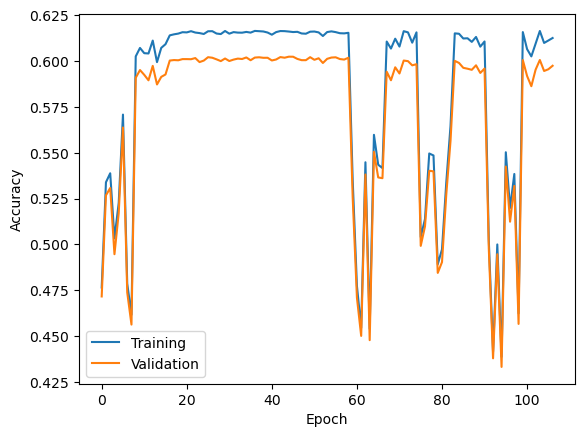

<Figure size 640x480 with 0 Axes>

In [1]:

import warnings
from sklearn.metrics import confusion_matrix
import sys

import numpy as np
import pickle
import datetime
import torch.nn as nn
import torch
from TrainHelper import train_model
from sklearn.model_selection import train_test_split
from CNNArchitecture import CNNArchitecture
import os
import matplotlib.pyplot as plt
import logging

# Set GPUID in here
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

modulationTypes = ["BPSK", "QPSK", "8PSK", "16QAM",
                   "64QAM", "PAM4", "GFSK", "CPFSK", "BFM", "DSBAM"]

label_dict = {'QAM16': 0, 'QAM64': 1, '8PSK': 2, 'WBFM': 3, 'BPSK': 4, 'CPFSK': 5, 'AM-DSB': 6, 'GFSK': 7,
              'PAM4': 8, 'QPSK': 9}

TrainParams = {}
DatasetParams = {}
L = 128
# Training done for the following batch sizes
BS_range = [32]
LR = 10 ** -3
initialize_type = 'Xavier'  # ['Xavier','Orthogonal']
TrainParams['num_epochs'] = 200
TrainParams['n_epochs_earlystop'] = 16
TrainParams['test_bactchsize'] = 1024
# These many iterations are done for every step
TrainParams['LRScheduler_stepsize'] = 8
# Every r itertaions, the LR is reduced by a multiplicative factor of LRSchedulerDecay
TrainParams['LRSchedulerGamma'] = 0.1
weight_decay = TrainParams['weight_decay'] = 5e-4
TrainParams['optimizer_type'] = 'Adam'
TrainParams['validation_size'] = 0.2
TrainParams['clip'] = 5

DatasetParams['SNRrange'] = np.arange(-20, 21, 2)
DatasetParams['Modulationtypes'] = ['QAM16', 'QAM64', '8PSK',
                                    'WBFM', 'BPSK', 'CPFSK', 'AM-DSB', 'GFSK', 'PAM4', 'QPSK']
DatasetParams['NumClasses'] = len(DatasetParams['Modulationtypes'])
DatasetParams['datatype'] = 'RML22'
DatasetParams['NumFrames'] = 2000
TrainParams['criterion'] = nn.CrossEntropyLoss()
TrainParams['computing_device'] = torch.device("cuda")

Savemodelfile_location = ''
datafilelocation = ''
datafilename = datafilelocation + DatasetParams['datatype'] + '.pickle.01A'


for BS in BS_range:
    TrainParams['initialize_type'] = initialize_type
    TrainParams['L'] = L
    TrainParams['BS'] = BS
    TrainParams['LR'] = LR

    Savemodelfilename = DatasetParams['datatype']

    '''
        Load dataset from the pickle file. The data is in a dictionary format with keys corresponding 
        to modulation and SNR. Every dict item in the dictionary contains X items per mod per SNR.
        '''
    f = open(datafilename, 'rb')
    dataset = pickle.load(f, encoding='latin1')
    f.close()
    print("Dataset loading completed")
    # read the keys - snrs and mods.
    snrs, mods = map(lambda j: sorted(
        list(set(map(lambda x: x[j], dataset.keys())))), [1, 0])
    X = []
    lbl = []
    for mod in mods:
        if mod in DatasetParams['Modulationtypes']:
            for snr in snrs:
                if snr in DatasetParams['SNRrange']:
                    X.append(dataset[(mod, snr)][0:DatasetParams['NumFrames']])
                    for i in range(DatasetParams['NumFrames']):
                        lbl.append((mod, snr))

    X = np.vstack(X)
    label_val = list(map(lambda x: lbl[x][0], range(len(lbl))))
    label = list(map(lambda x: label_dict[x], label_val))
    label = np.array(label)
    data = X[:, :, 0:L]
    del dataset, X  # deleting large arrays to free up space in RAM.
    modelclass = CNNArchitecture

    def loadSplitTrain(modelclass, Savemodelfile_location, Savemodelfilename, data, label, TrainParams):

        model = modelclass(DatasetParams['NumClasses'])
        x_train, x_test, y_train, y_test = train_test_split(data, label,
                                                            test_size=TrainParams['validation_size'], random_state=1)
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                          test_size=TrainParams['validation_size'],
                                                          random_state=1)
        train_set = {'data': torch.tensor(x_train).float(
        ), 'labels': torch.tensor(y_train).float()}
        val_set = {'data': torch.tensor(x_val).float(
        ), 'labels': torch.tensor(y_val).float()}
        del data

        ############ ############### Train Model ########################## ##########
        ############ ############ ############ ############ ############ ############
        model_file = Savemodelfile_location + Savemodelfilename + '_model.pt'
        model1, Loss, Accuracy = train_model(
            model, model_file, train_set, val_set, TrainParams)
        # Save Loss and accuracy plots

        plt.figure(1)
        epochs = [i for i in range(len(Loss['train']))]
        plt.plot(epochs, Loss['train'])
        plt.plot(epochs, Loss['valid'])
        plt.title('')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Training', 'Validation'])
        plt.savefig(Savemodelfile_location +
                    Savemodelfilename + 'model_loss.png')
        plt.show()
        plt.clf()
        # plt.show()

        plt.figure(2)
        plt.plot(epochs, Accuracy['train'])
        plt.plot(epochs, Accuracy['valid'])
        plt.title('')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Training', 'Validation'])
        plt.savefig(Savemodelfile_location +
                    Savemodelfilename + 'model_acc.png')
        plt.show()
        plt.clf()

    loadSplitTrain(modelclass, Savemodelfile_location,
                   Savemodelfilename, data, label, TrainParams)
f.close()

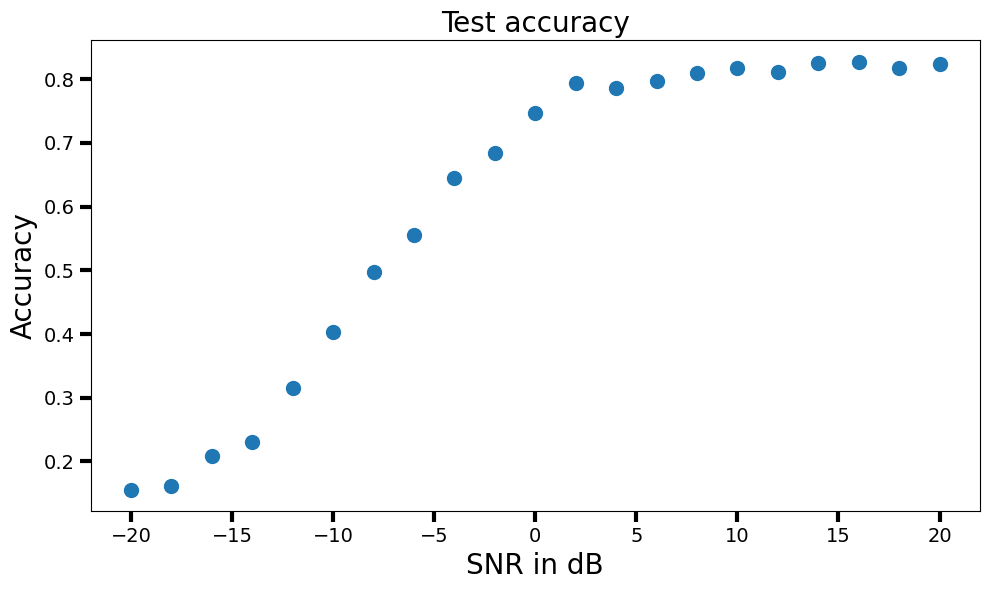

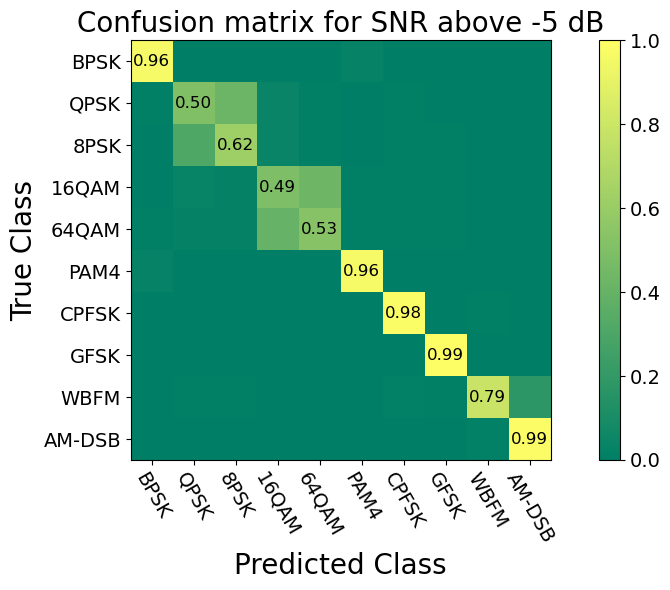

In [8]:
# Test and plot accuracy versus SNR


# Turn off warnings
warnings.filterwarnings('ignore')


os.environ["CUDA_VISIBLE_DEVICES"] = "1"

modulationTypes = ["BPSK", "QPSK", "8PSK", "16QAM",
                   "64QAM", "PAM4", "GFSK", "CPFSK", "BFM", "DSBAM"]

label_dict = {'QAM16': 0, 'QAM64': 1, '8PSK': 2, 'WBFM': 3, 'BPSK': 4, 'CPFSK': 5, 'AM-DSB': 6, 'GFSK': 7,
              'PAM4': 8, 'QPSK': 9}

DatasetParams = {}
# L = 128
DatasetParams['SNRrange'] = np.arange(-20, 21, 2)
DatasetParams['Modulationtypes'] = ['QAM16', 'QAM64', '8PSK',
                                    'WBFM', 'BPSK', 'CPFSK', 'AM-DSB', 'GFSK', 'PAM4', 'QPSK']
DatasetParams['NumClasses'] = len(DatasetParams['Modulationtypes'])
DatasetParams['datatype'] = 'RML22'
DatasetParams['NumFrames'] = 1000
DatasetParams['frameLength'] = 128
TestParams = {}
TestParams['validation_size'] = 0.2
TestParams['test_BS'] = 1024
TestParams['computing_device'] = torch.device("cuda")
modulation_reordered = ['BPSK', 'QPSK', '8PSK', '16QAM',
                        '64QAM', 'PAM4', 'CPFSK', 'GFSK', 'WBFM', 'AM-DSB']
DatasetParams['NumClasses'] = len(DatasetParams['Modulationtypes'])

modelfile = DatasetParams['datatype'] + '_model.pt'
accuracy = {}
dataset = {}


def calculate_accuracy(model, data, label, batch_size, computing_device, CM_flag):
    model.eval()
    with torch.no_grad():
        n_samples = data.shape[0]
        n_minibatch = int((n_samples + batch_size - 1) / batch_size)
        accuracy = 0
        I = np.arange(n_samples)
        CM_prediction = []
        for i in range(n_minibatch):
            idx = I[batch_size * i:min(batch_size * (i + 1), n_samples)]
            dt = data[idx].to(computing_device)
            lbl = label[idx].numpy()
            output = model(dt)
            output = output.cpu().numpy()
            output = np.argmax(output, axis=1)
            CM_prediction.extend(list(output))
            accuracy += np.sum(output == lbl)
        if CM_flag:
            return accuracy / n_samples, np.array(CM_prediction)
        else:
            return accuracy / n_samples


datafilename = DatasetParams['datatype'] + '_TestDataset.pickle.16S'
f = open(datafilename, 'rb')
dataset = pickle.load(f, encoding='latin1')
f.close()


for mod in DatasetParams['Modulationtypes']:
    for snr in DatasetParams['SNRrange']:

        # Load pre-trained model
        modelclass = CNNArchitecture
        if 'model' in globals():
            # deleting it so that pre-loaded model in previous loop iteration doesnt not mess up this one.
            del model
        model = modelclass(DatasetParams['NumClasses'])
        model.load_state_dict(torch.load(modelfile))
        model = model.to(TestParams['computing_device'])
        data = dataset[(mod, snr)][0:DatasetParams['NumFrames']]
        label = label_dict[mod]*np.ones((data.shape[0],))
        x_train, x_test, y_train, y_test = train_test_split(data, label,
                                                            test_size=TestParams['validation_size'],
                                                            random_state=1)
        test_data = torch.tensor(x_test).float()
        test_label = torch.tensor(y_test).float()
        accuracy[(mod, snr)] = calculate_accuracy(model, test_data, test_label,
                                                  TestParams['test_BS'],
                                                  TestParams['computing_device'], False)
snrs, mods = map(lambda j: sorted(
    list(set(map(lambda x: x[j], dataset.keys())))), [1, 0])
lowSNR = -4
highSNR = 21
snrrange_confusionmatrix = range(lowSNR, highSNR, 2)
X = []
lbl = []
for mod in mods:
    for snr in snrrange_confusionmatrix:
        X.append(dataset[(mod, snr)][0:DatasetParams['NumFrames']])
        for i in range(DatasetParams['NumFrames']):
            lbl.append((mod, snr))
del dataset
X = np.vstack(X)
label_val = list(map(lambda x: lbl[x][0], range(len(lbl))))
label = list(map(lambda x: label_dict[x], label_val))
label = np.array(label)
dataset = X[:, :, 0:DatasetParams['frameLength']]
del X

x_train, x_test, y_train, y_test = train_test_split(
    dataset, label, test_size=TestParams['validation_size'], random_state=1)
test_data = torch.tensor(x_test).float()
test_label = torch.tensor(y_test).float()
acc_dummy, y_pred = calculate_accuracy(model, test_data, test_label, TestParams['test_BS'],
                                       TestParams['computing_device'], True)
# Order of modulations are BPSK, QPSK, 8PSK, 16QAM, 64QAM, PAM4, CPFSK, GFSK, WBFM, AM-DSB
# We group similar modulation types together in the confusion matrix plots.
# Phase senstive ones followed by other digital and then analog modulation types.
label_reordered = [4, 9, 2, 0, 1, 8, 5, 7, 3, 6]
confusion_mat = confusion_matrix(y_test, y_pred, labels=label_reordered)
confusion_mat = confusion_mat.astype(float)

accvsSNR = {}
plt.figure(1, figsize=(10, 6))
snridx = 0
accvsSNR = np.zeros((len(DatasetParams['SNRrange']),))
for snr in DatasetParams['SNRrange']:
    for mod in DatasetParams['Modulationtypes']:
        accvsSNR[snridx] = accvsSNR[snridx] + accuracy[mod, snr]
    accvsSNR[snridx] = accvsSNR[snridx]/len(DatasetParams['Modulationtypes'])
    snridx = snridx+1
markerval = 'o'
plt.plot(DatasetParams['SNRrange'], accvsSNR, markerval, markersize=10)

plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=True, length=8, width=3,
                direction='out')
# plt.legend(legend_text,fontsize=36)
plt.title("Test accuracy", fontsize=20)
plt.xlabel("SNR in dB", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

confusionmat_norm = np.zeros(confusion_mat.shape)
for row_idx in np.arange(confusion_mat.shape[0]):
    sum = np.sum(confusion_mat[row_idx])
    for col_idx in np.arange(confusion_mat.shape[1]):
        confusionmat_norm[row_idx][col_idx] = confusion_mat[row_idx][col_idx]/sum
plt.figure(1, figsize=(10, 6))

im = plt.imshow(confusionmat_norm, cmap='summer',
                interpolation='nearest', vmin=0, vmax=1)

width, height = confusionmat_norm.shape
for x in range(width):
    for y in range(height):
        if x == y:

            confusionmat_norm_val_2decimalplaces = "{:0.2f}".format(
                confusionmat_norm[x][y])
            if confusionmat_norm_val_2decimalplaces == "1.00":
                confusionmat_norm_val_2decimalplaces = "1.0"
            if confusionmat_norm_val_2decimalplaces == "0.00":
                confusionmat_norm_val_2decimalplaces = "0"
            plt.annotate(str(confusionmat_norm_val_2decimalplaces), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center', fontsize=12)

plt.xticks(np.arange(DatasetParams['NumClasses']),
           modulation_reordered, rotation=300, fontsize=14)
plt.yticks([], [])
plt.title("Confusion matrix for SNR above -5 dB", fontsize=20)
plt.xlabel('Predicted Class', fontsize=20)
cbar = plt.colorbar(im)
tick_font_size = 14
cbar.ax.tick_params(labelsize=tick_font_size)
plt.yticks(np.arange(DatasetParams['NumClasses']),
           modulation_reordered, rotation=0, fontsize=14)
plt.ylabel('True Class', fontsize=20)
plt.tight_layout()
plt.show()